# Juypter Notebook

The following cell import common libaries.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Generate a simple plot.

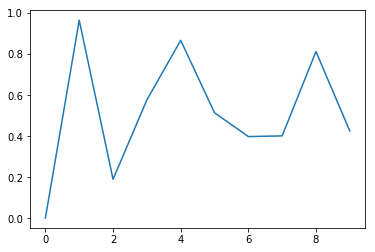

In [39]:
data = np.random.rand(10)
plt.plot(data)

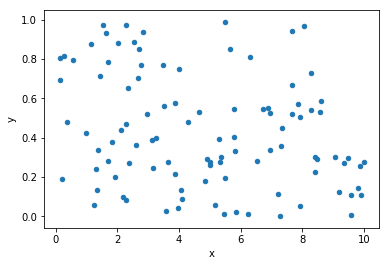

In [40]:
n = 100
df = pd.DataFrame({'x':10*np.random.rand(n), 'y':np.random.rand(n)})
df.plot.scatter('x', 'y')

DataFrame apply function

In [41]:
df = pd.DataFrame({'a':[1,2,3], 'b':[3,2,1]})

In [42]:
df.apply(np.sqrt)

,a,b
0,1.000000,1.732051
1,1.414214,1.414214
2,1.732051,1.000000


In [43]:
df.applymap(np.sqrt)

,a,b
0,1.000000,1.732051
1,1.414214,1.414214
2,1.732051,1.000000


In [44]:
df.apply(np.sum)

a    6
b    6
dtype: int64

In [45]:
df.apply(np.sum, broadcast=True)

,a,b
0,6,6
1,6,6
2,6,6


Add row/column to DataFrame

In [46]:
df.append({'a':4,'b':4}, ignore_index=True)

,a,b
0,1,3
1,2,2
2,3,1
3,4,4


In [47]:
ts = pd.Series([5, 5], ['a', 'b'], name='test')
df.append(ts)

,a,b
0,1,3
1,2,2
2,3,1
test,5,5


In [48]:
df['c']=['M', 'F', 'F']
df

,a,b,c
0,1,3,M
1,2,2,F
2,3,1,F


DataFrame groupby + agg/transform/apply functions

In [49]:
df.groupby('c', group_keys=True).sum()

,a,b
c,,
F,5,3
M,1,3


In [50]:
df.groupby('c').aggregate([np.sum, np.mean, np.std])

a                  b               
  sum mean       std sum mean       std
c                                      
F   5  2.5  0.707107   3  1.5  0.707107
M   1  1.0       NaN   3  3.0       NaN

In [51]:
df.groupby('c').aggregate({'a':np.sum, 'b':np.mean})

,a,b
c,,
F,5,1.5
M,1,3.0


In [52]:
df.groupby('c').transform(lambda x: x - x.mean())

,a,b
0,0.0,0.0
1,-0.5,0.5
2,0.5,-0.5


In [53]:
df

,a,b,c
0,1,3,M
1,2,2,F
2,3,1,F


In [54]:
df.groupby('c').apply(lambda x: x['a'])

c   
F  1    2
   2    3
M  0    1
Name: a, dtype: int64

In [55]:
df.groupby('c').apply(lambda x: x.describe())

a         b
c                          
F count  2.000000  2.000000
  mean   2.500000  1.500000
  std    0.707107  0.707107
  min    2.000000  1.000000
  25%    2.250000  1.250000
  50%    2.500000  1.500000
  75%    2.750000  1.750000
  max    3.000000  2.000000
M count  1.000000  1.000000
  mean   1.000000  3.000000
  std         NaN       NaN
  min    1.000000  3.000000
  25%    1.000000  3.000000
  50%    1.000000  3.000000
  75%    1.000000  3.000000
  max    1.000000  3.000000

In [56]:
df.groupby('c').apply(lambda x: x.describe()).index

MultiIndex(levels=[['F', 'M'], ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7]],
           names=['c', None])

In [57]:
df.groupby('c').apply(lambda x: x.describe()).loc[('F', 'count')]

a    2.0
b    2.0
Name: (F, count), dtype: float64

In [58]:
df.groupby('c').apply(lambda x: x.describe()).loc[('F', 'count')]['a']

2.0

In [59]:
df.groupby('c').apply(lambda x: x.describe()).iloc[(1, 0)]

2.5

In [60]:
df.groupby('c').apply(lambda x: x['a'])

c   
F  1    2
   2    3
M  0    1
Name: a, dtype: int64

magic command: load

In [61]:
# %load e:\mydoc\bitbucket\work\HBKNote\aaa.py
#!/usr/bin/env python

class AAA:
    def __init__(self, x):
        self._x = x

Instance = AAA('hoha')        

   
    


In [62]:
Instance

Tips: Ctrl+Shift+p brings up shortcut search box

https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

In [65]:
!echo haha

haha
